In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [2]:
dataset = pd.read_csv("../Datasets/Cupcakes vs Muffins.csv")
dataset.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


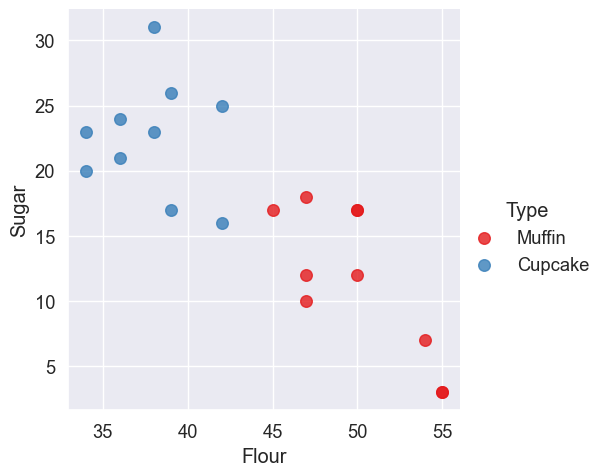

In [3]:
# Plotting the data
sns.lmplot(x="Flour", y="Sugar", data=dataset, hue="Type", palette="Set1",fit_reg=False,scatter_kws={'s':70})

In [4]:
# Creating a type label
type_label = np.where(dataset['Type']== 'Muffin',0,1)

In [5]:
type_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
# Selecting the columns to use
recipes = dataset.columns[1:].values.tolist()
ingredients = dataset[["Flour","Sugar"]].values
ingredients

array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]], dtype=int64)

In [7]:
# The model
model = svm.SVC(kernel='linear')
model.fit(ingredients,type_label)

SVC(kernel='linear')

In [8]:
# Demonstrating the hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Ploting the parallels to separating hyperplane that passes through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

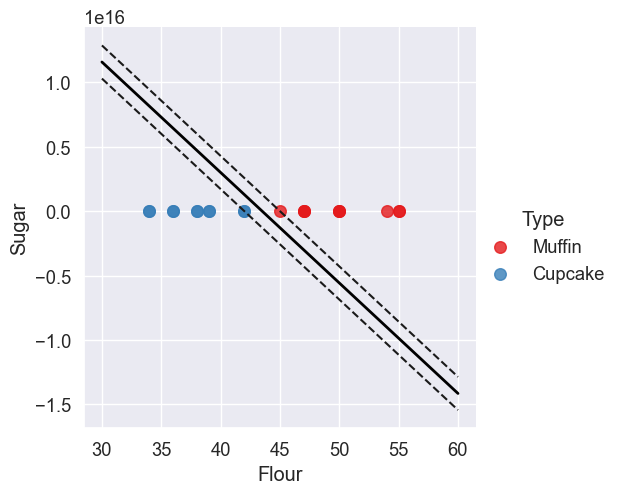

In [9]:
sns.lmplot(x="Flour", y="Sugar", data=dataset, hue="Type", palette="Set1",fit_reg=False,scatter_kws={'s':70})
plt.plot(xx,yy, linewidth=2, color='black')
plt.plot(xx,yy_down, 'k--')
plt.plot(xx,yy_up, 'k--')

In [10]:
def cupcakeOrMuffin(flour,sugar):
    if model.predict([[flour,sugar]]) ==0:
        print('It\'s a Muffin')
    else:
        print('It\'s a Cupcake')
        
cupcakeOrMuffin(50,30)

It's a Muffin
